In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import glob
import pickle

In [21]:
targets = ['braf','5ht1b','parp1', 'fa7','jak2']
iterations = [9,10,9,10,9]
cutoff = {'braf':-10.1,'5ht1b':-10.4,'parp1':-10.3, 'fa7':-8.3,'jak2':-9.6}
result = dict()
dd2_final_dock_dfs = []
for  tar, iter in zip(targets,iterations):
    dd2_df = pd.read_csv(f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/5FinalDockVina_{tar}_bald_advanced_molformer_False_True/iteration_29/final_dock_res.csv')
    dd1_df = pd.read_csv(f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/3DDFinalDock_{tar}_greedy_mlp3K_True_False/iteration_{iter}/final_dock_res.csv')
    dd2_dy_df = pd.read_csv(f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/6FinalDock_{tar}_bald_advanced_molformer_False_False/iteration_29/final_dock_res.csv')
    dd2_dy_drop_df = pd.read_csv(f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/7FinalDock_{tar}_bald_advanced_molformer_True_False/iteration_29/final_dock_res.csv')

    result[tar] = {'dd1':dd1_df, 'dd2':dd2_df, 'dd2_dyn': dd2_dy_df, 'dd2_dy_drop':dd2_dy_drop_df}

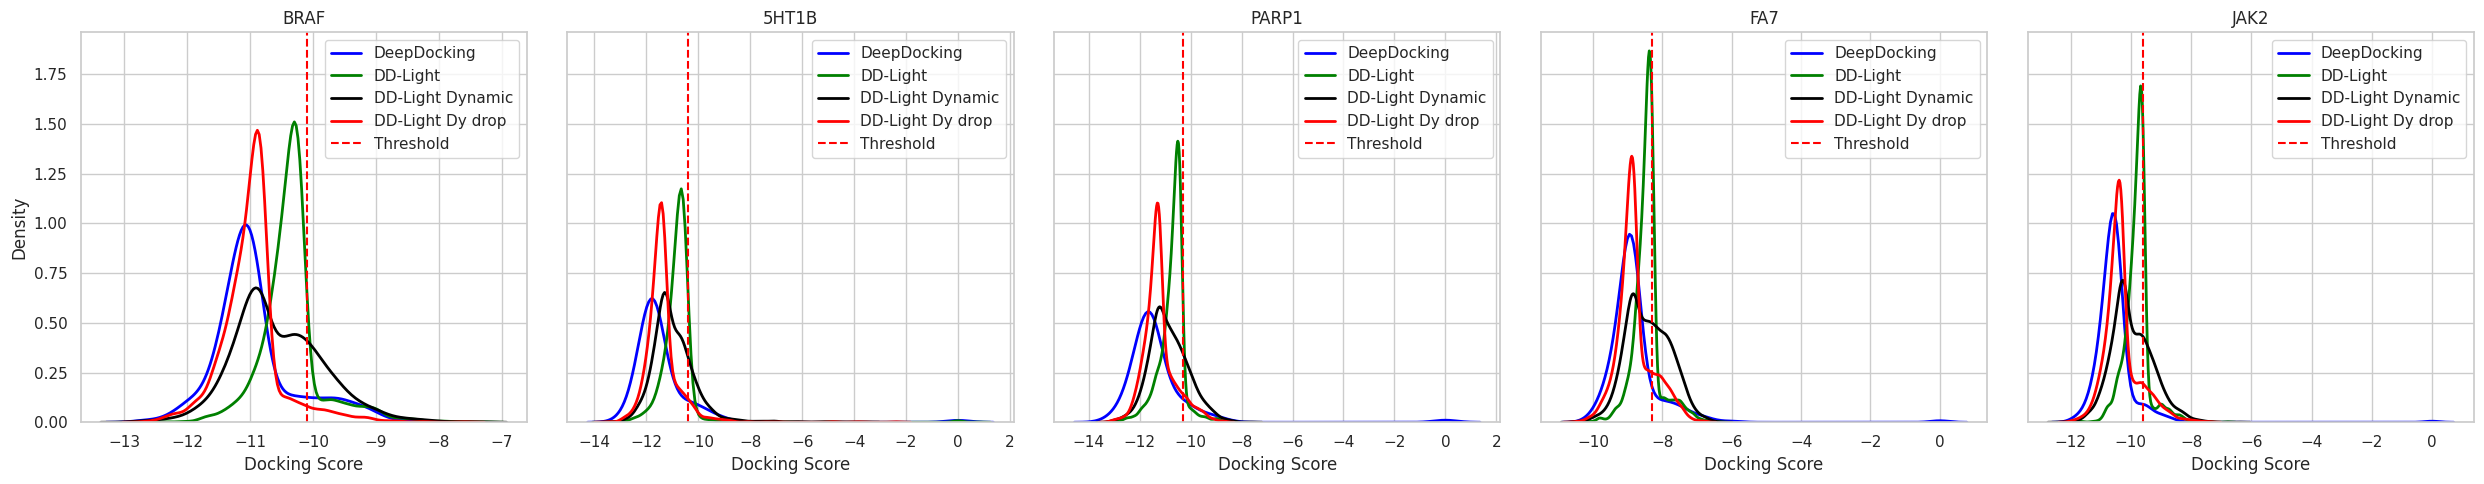

In [5]:
# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

for i, tar in enumerate(targets):
    ax = axes[i]
    dd1_scores = result[tar]['dd1']['dock_score']
    dd2_scores = result[tar]['dd2']['dock_score']
    dd2_dy_scores = result[tar]['dd2_dyn']['dock_score']
    dd2_dy_drop_scores = result[tar]['dd2_dy_drop']['dock_score']
    
    sns.kdeplot(dd1_scores, ax=ax, label='DeepDocking', color='blue', linewidth=2)
    sns.kdeplot(dd2_scores, ax=ax, label='DD-Light', color='green', linewidth=2)
    sns.kdeplot(dd2_dy_scores, ax=ax, label='DD-Light Dynamic', color='black', linewidth=2)
    sns.kdeplot(dd2_dy_drop_scores, ax=ax, label='DD-Light Dy drop', color='red', linewidth=2)


    
    ax.axvline(cutoff[tar], color='red', linestyle='--', label='Threshold')
    ax.set_title(f'{tar.upper()}')
    ax.set_xlabel('Docking Score')
    if i == 0:
        ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()

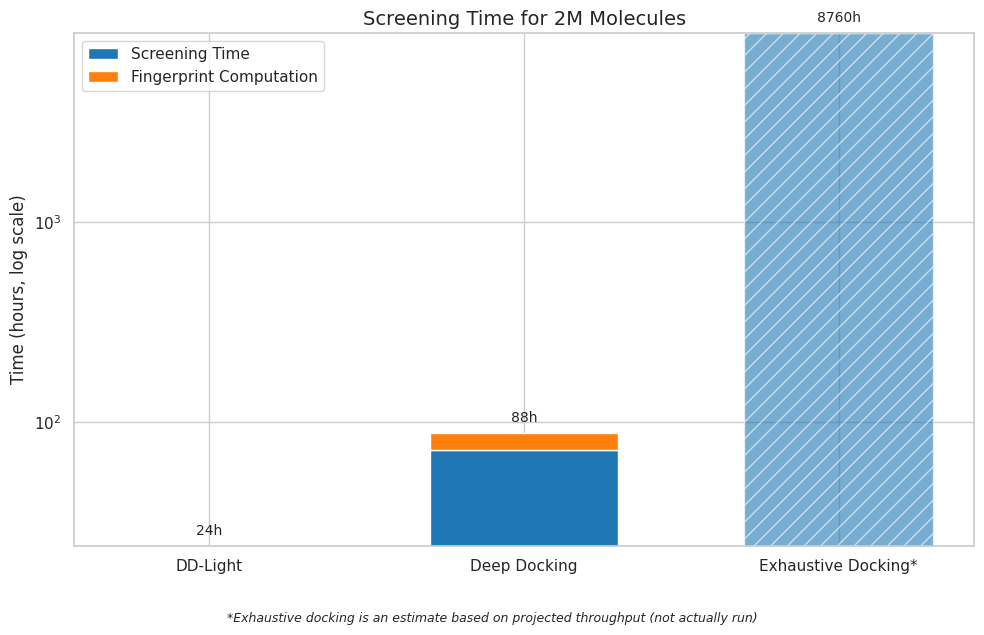

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['DD-Light', 'Deep Docking', 'Exhaustive Docking*']
screening_times = [24, 72, 8760]  # in hours
fingerprint_times = [0, 16, 0]

# Positions and width
x = np.arange(len(methods))
width = 0.6

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Bars
bar1 = ax.bar(x, screening_times, width, label='Screening Time', color='#1f77b4')
bar2 = ax.bar(x, fingerprint_times, width, bottom=screening_times, label='Fingerprint Computation', color='#ff7f0e')

# Hatch and transparency for estimated value
bar1[2].set_hatch('//')
bar1[2].set_alpha(0.6)
bar2[2].set_hatch('//')
bar2[2].set_alpha(0.6)

# Log scale
ax.set_yscale('log')
ax.set_ylabel('Time (hours, log scale)', fontsize=12)
ax.set_title('Screening Time for 2M Molecules', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=11)
ax.legend()

# Add annotations
for i in range(len(methods)):
    total = screening_times[i] + fingerprint_times[i]
    ax.text(x[i], total * 1.1, f'{total}h', ha='center', va='bottom', fontsize=10)

# Footnote
plt.figtext(0.5, -0.05, "*Exhaustive docking is an estimate based on projected throughput (not actually run)", 
            wrap=True, ha='center', fontsize=9, style='italic')

plt.tight_layout()
plt.show()


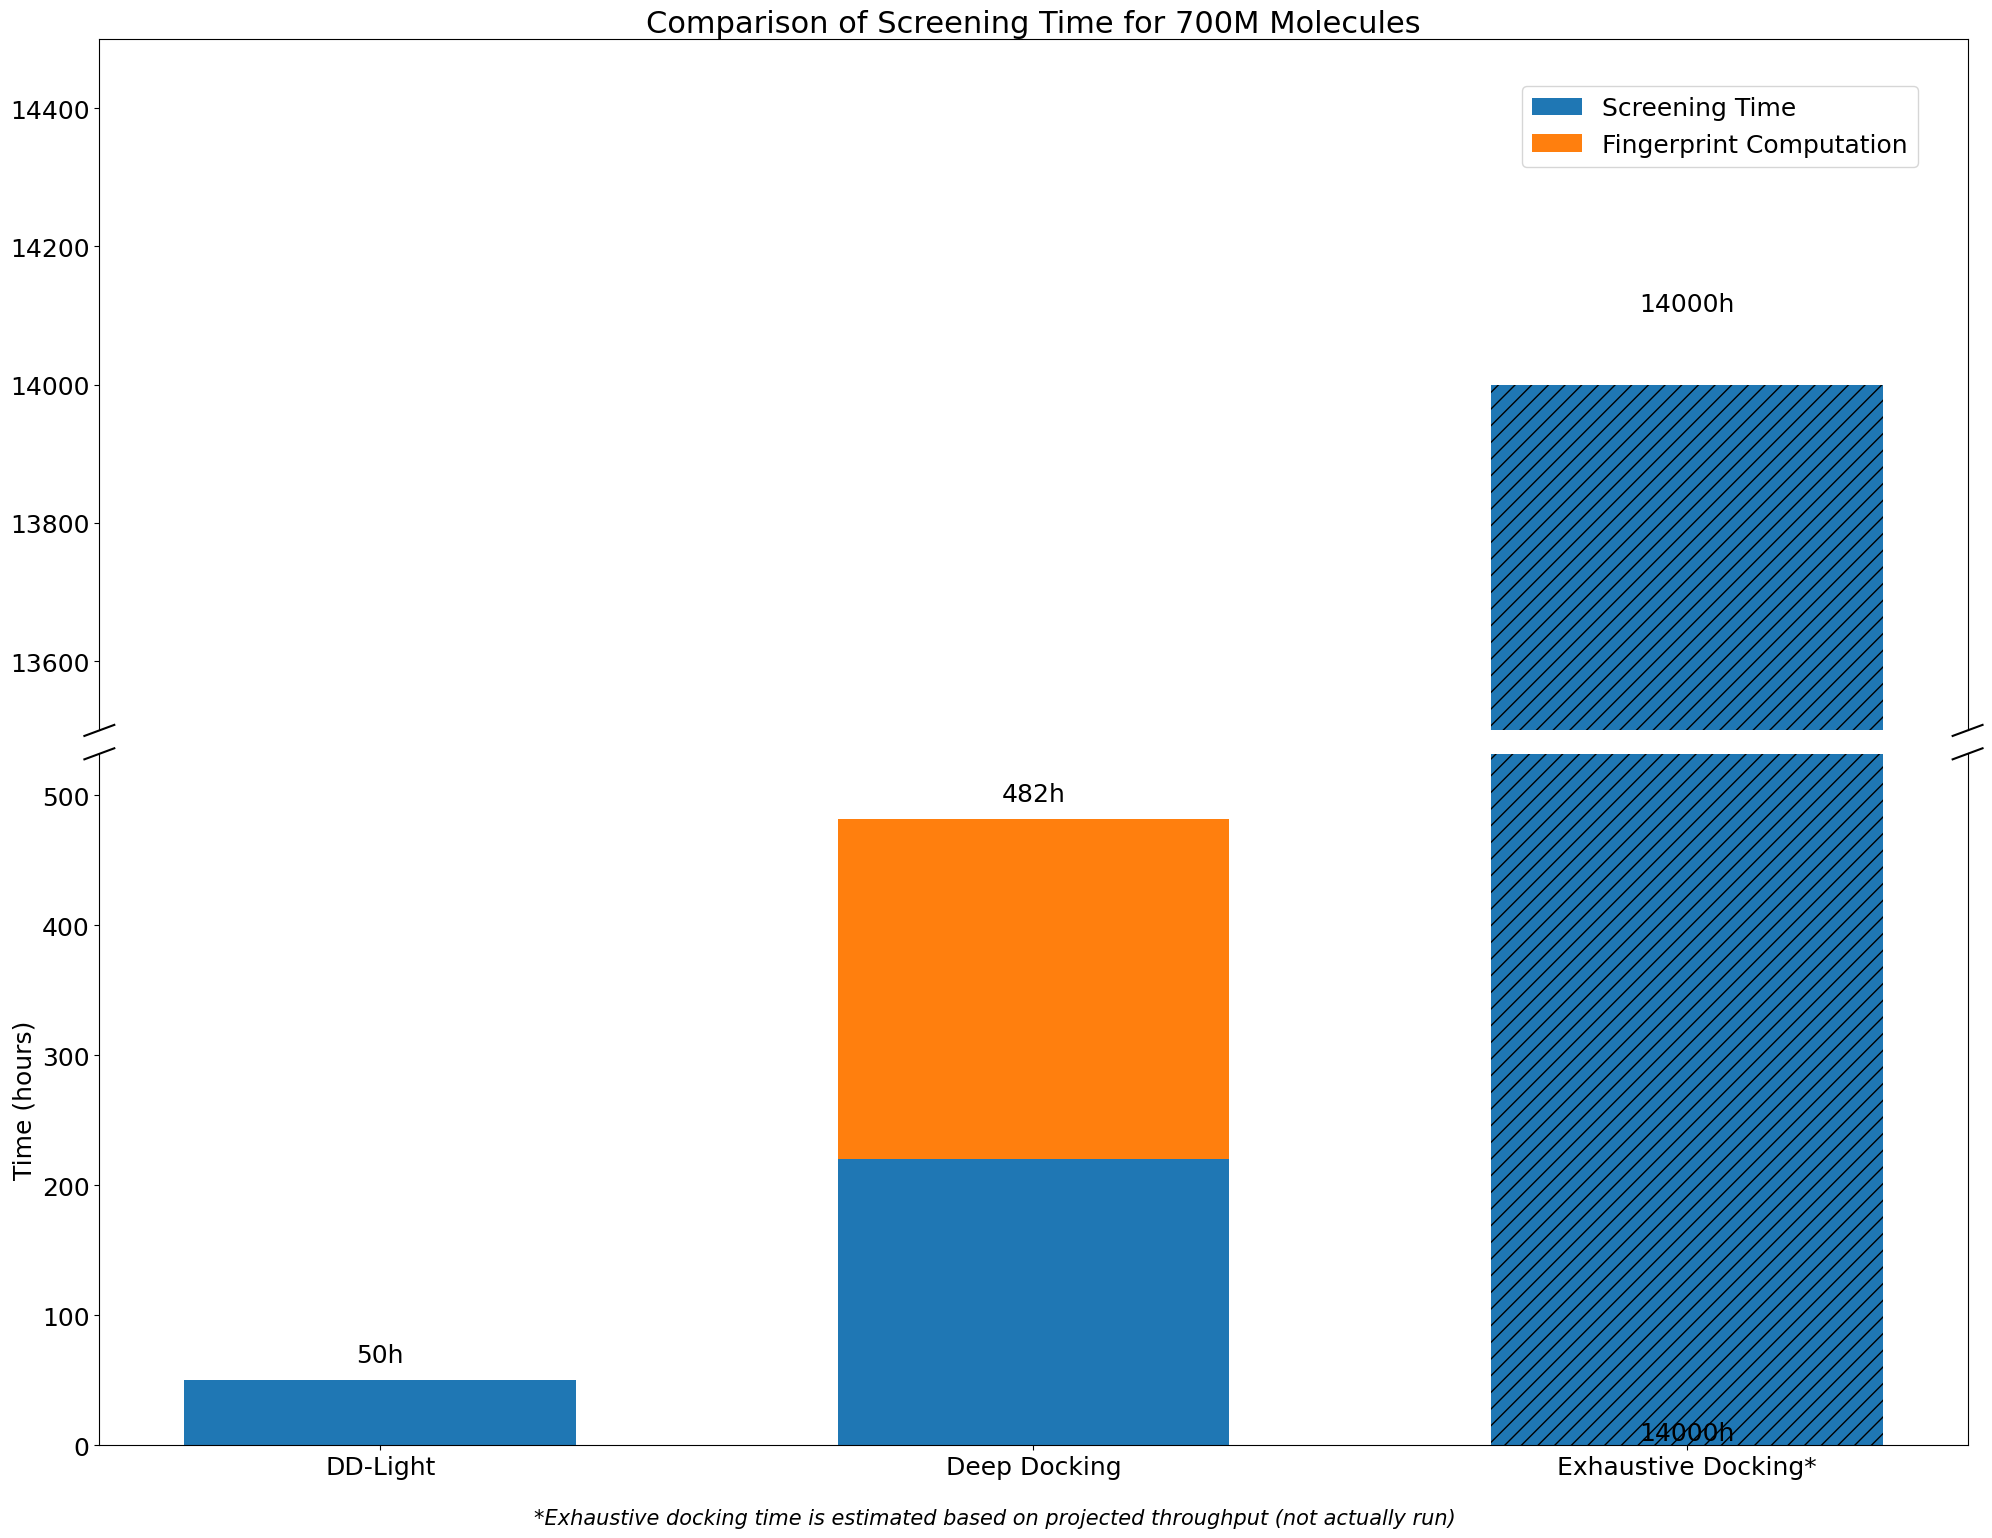

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['DD-Light', 'Deep Docking', 'Exhaustive Docking*']
screening_times = [50, 220, 14000]  # Updated screening times
fingerprint_times = [0, 262, 0]     # Updated fingerprint computation times
total_times = [a + b for a, b in zip(screening_times, fingerprint_times)]
x = np.arange(len(methods))
width = 0.6

# Automatically determine broken axis ranges
lower_max = max(total_times[:2]) + 50   # lower panel range (DeepDocking/DD-Light)
upper_min = min(total_times[2:]) - 500  # upper panel range (Exhaustive)
upper_max = max(total_times[2:]) + 500

# Set up figure with broken y-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 15), gridspec_kw={'height_ratios': [1, 1]})

# Top plot (zoom in on Exhaustive Docking)
ax1.bar(x, screening_times, width, label='Screening Time', color='#1f77b4')
ax1.bar(x, fingerprint_times, width, bottom=screening_times, label='Fingerprint Computation', color='#ff7f0e')
ax1.set_ylim(upper_min, upper_max)

# Bottom plot (zoom in on DD-Light and DeepDocking)
ax2.bar(x, screening_times, width, color='#1f77b4')
ax2.bar(x, fingerprint_times, width, bottom=screening_times, color='#ff7f0e')
ax2.set_ylim(0, lower_max)

# Hatch pattern to indicate estimated time
ax1.bar(x[2], screening_times[2], width, color='#1f77b4', hatch='//', alpha=0.6)
ax2.bar(x[2], screening_times[2], width, color='#1f77b4', hatch='//', alpha=0.6)

# Annotate time values
for i in range(len(methods)):
    y_offset = 10 if total_times[i] < 1000 else 300
    ax2.text(x[i], total_times[i] + y_offset if i != 2 else 0, f'{total_times[i]}h', 
             ha='center', va='bottom', fontsize=18)
    if i == 2:
        ax1.text(x[i], total_times[i] + 100, f'{total_times[i]}h', ha='center', va='bottom', fontsize=18)

# Hide spines and draw diagonal break marks
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False, bottom=False)
ax2.tick_params(top=False)

# Diagonal lines
d = .008
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Set labels and title
ax2.set_ylabel("Time (hours)", fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(methods, fontsize=18)
ax1.set_title("Comparison of Screening Time for 700M Molecules", fontsize=22, pad=5)
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
# Place the legend inside ax1 (top subplot)
ax1.legend(loc='upper right', bbox_to_anchor=(0.98, 0.95), fontsize=18, frameon=True)

# Add footnote
plt.figtext(0.5, -0.02, 
            "*Exhaustive docking time is estimated based on projected throughput (not actually run)", 
            ha="center", fontsize=15, style='italic')


plt.tight_layout()
plt.savefig("screening_time_comparison_updated.png", dpi=350)
plt.show()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


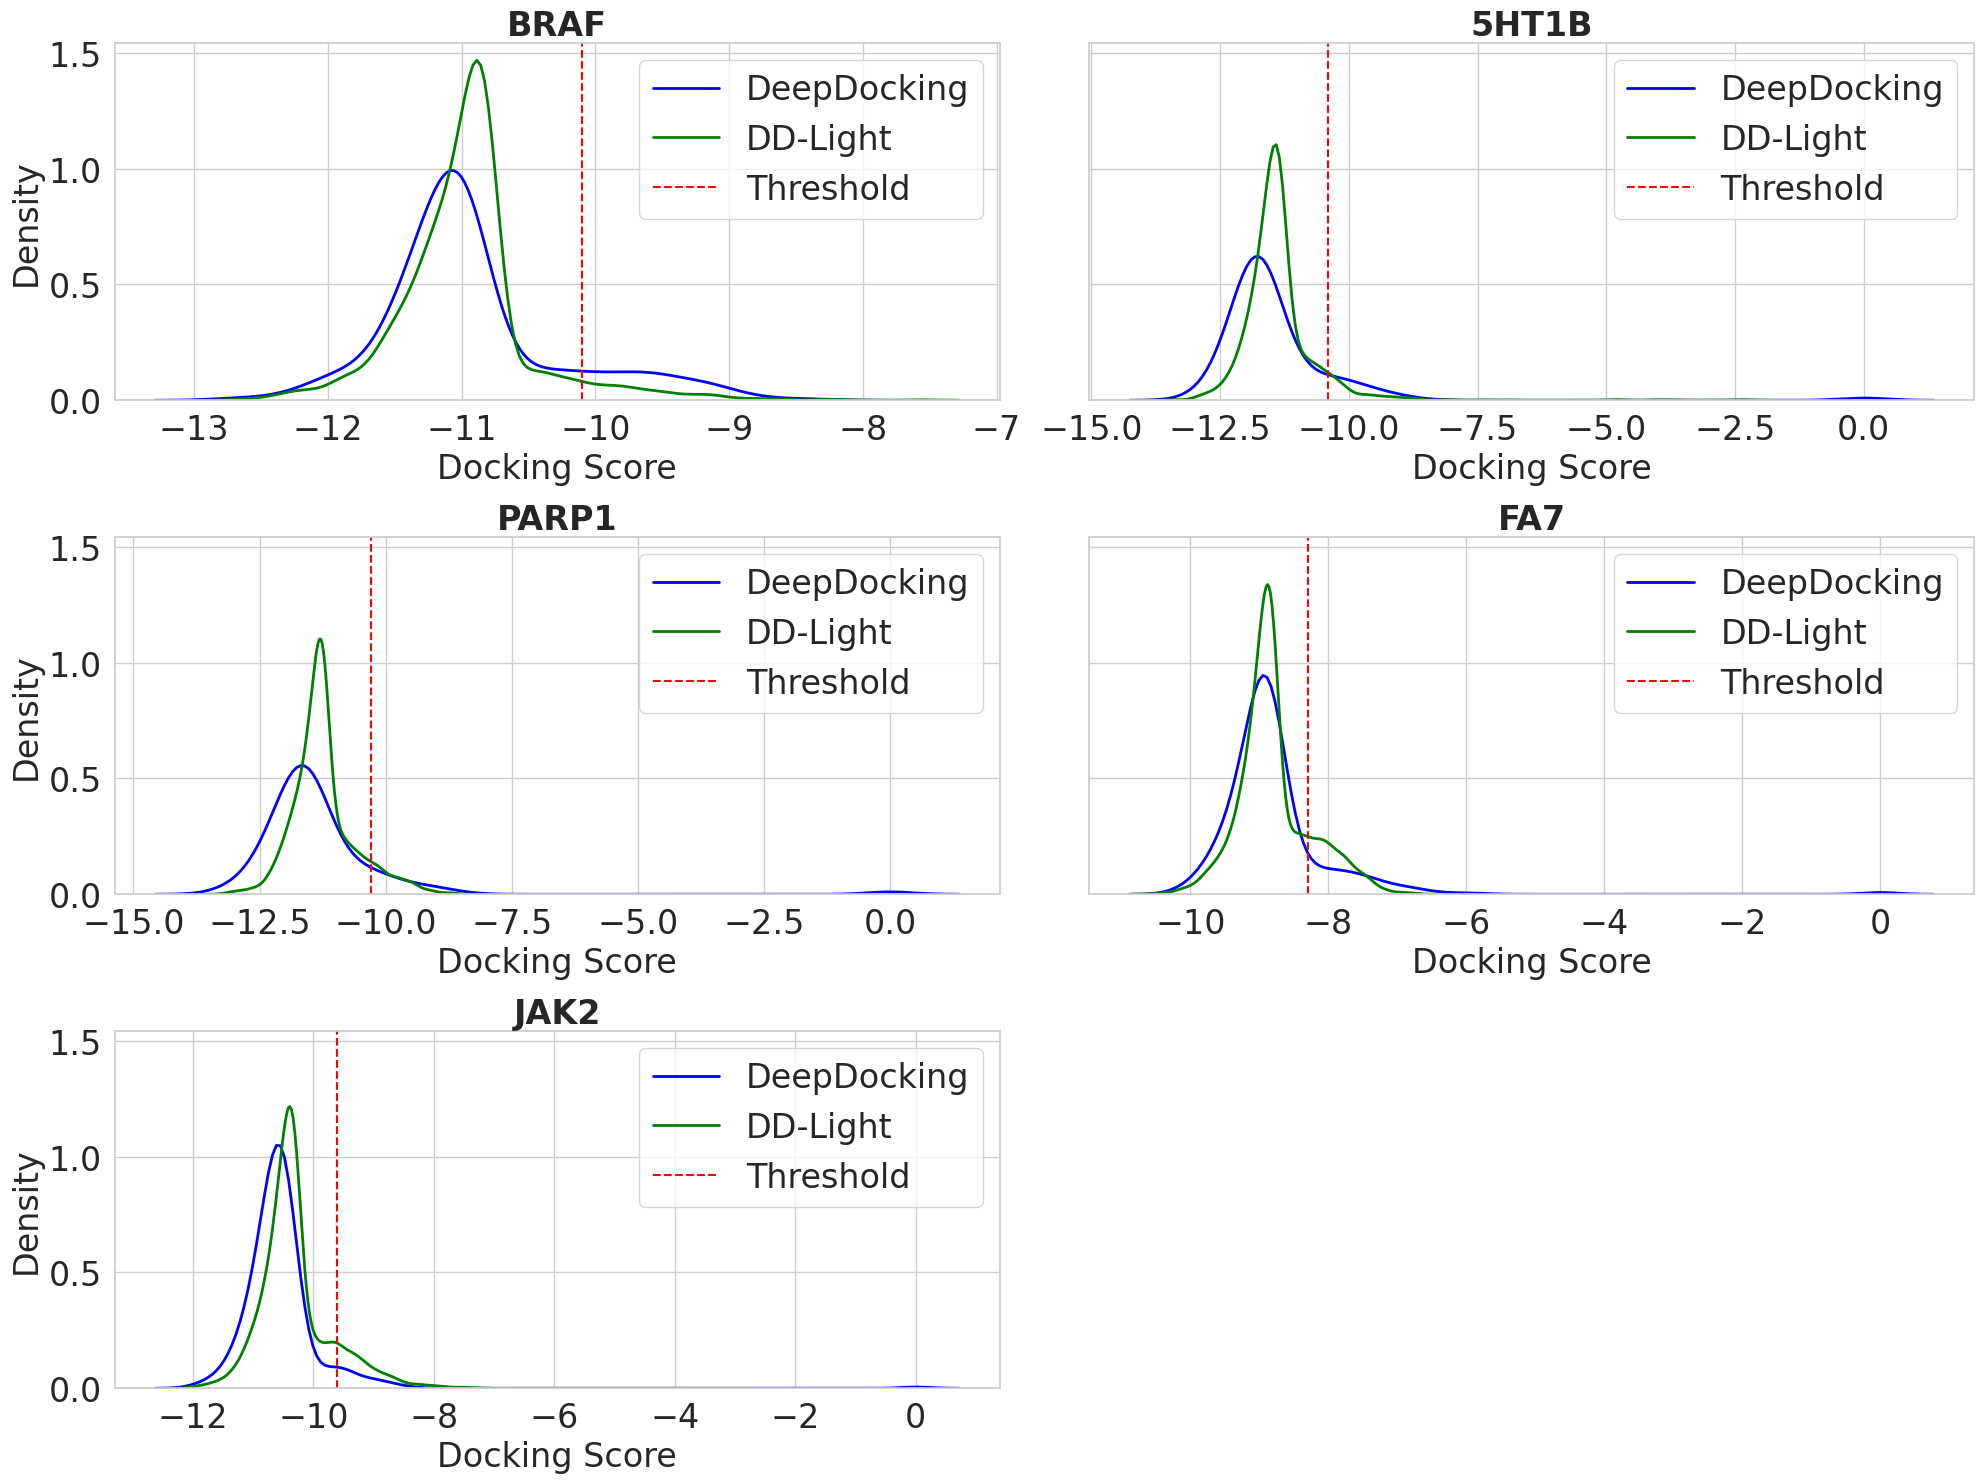

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(20, 15), sharey=True)
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, tar in enumerate(targets):
    ax = axes[i]
    dd1_scores = result[tar]['dd1']['dock_score']
    dd2_scores = result[tar]['dd2_dy_drop']['dock_score']
    
    sns.kdeplot(dd1_scores, ax=ax, label='DeepDocking', color='blue', linewidth=2)
    sns.kdeplot(dd2_scores, ax=ax, label='DD-Light', color='green', linewidth=2)
    
    ax.axvline(cutoff[tar], color='red', linestyle='--', label='Threshold')
    ax.set_title(f'{tar.upper()}', fontsize=24, fontweight='bold')
    # ax.set_title(f'{tar.upper()}', fontsize=24)
    ax.set_xlabel('Docking Score', fontsize=24)
    if i % 2 == 0:
        ax.set_ylabel('Density', fontsize=24)
    ax.tick_params(axis='both', labelsize=24)
    ax.legend(fontsize=24)

# Hide the 6th (empty) subplot
if len(targets) < len(axes):
    for j in range(len(targets), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('docking_score_distributions.png', dpi=350)

plt.show()


# Entropy of all virtual hits

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

def add_morgan_fingerprints(data, radius=2, n_bits=2048):
    """
    Add Morgan fingerprint to each (mol_id, smiles, pred_proba) tuple.
    Returns a list of (mol_id, smiles, pred_proba, fingerprint) tuples.
    """
    results = []
    for mol_id, smiles, pred_proba in data:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Invalid SMILES for {mol_id}")
            continue
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        fp_array = np.array(fp)
        results.append((mol_id, smiles, pred_proba, fp_array))
    return results

dd1_all_mols_virthits_files = glob.glob(f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/3DDFinalDock_{tar}_greedy_mlp3K_True_False/iteration_{iter}/allmols_virthits_*.pkl')
dd2_all_mols_virthits_files = glob.glob(f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/7FinalDock_{tar}_bald_advanced_molformer_True_False/iteration_29/allmols_virthits_*.pkl')
dd1_all_virtual_hits, dd2_all_virtual_hits = [], []
for f in dd1_all_mols_virthits_files:
    dd1_all_virtual_hits.extend(pickle.load(open(f,'rb'))[1])
for f in dd2_all_mols_virthits_files:
    dd2_all_virtual_hits.extend(pickle.load(open(f,'rb'))[1])
dd1_all_virtual_hits, dd2_all_virtual_hits = add_morgan_fingerprints(dd1_all_virtual_hits), add_morgan_fingerprints(dd2_all_virtual_hits)

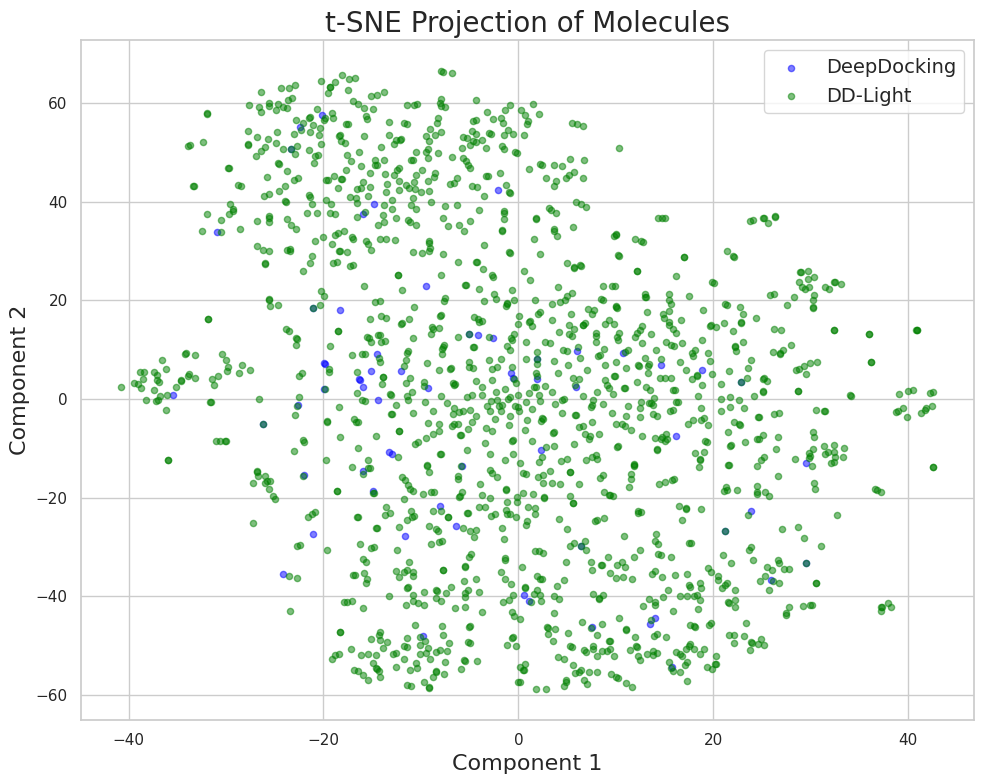

Entropy (DeepDocking): 4.1214
Entropy (DD-Light):    7.2973


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import KernelDensity
from scipy.stats import entropy

# Step 1: Extract fingerprints
def extract_fps(fingerprinted_data):
    return np.array([fp for _, _, _, fp in fingerprinted_data])

X_dd1 = extract_fps(dd1_all_virtual_hits)
X_dd2 = extract_fps(dd2_all_virtual_hits)

# Step 2: Reduce dimensionality using t-SNE
X_combined = np.vstack([X_dd1, X_dd2])
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
X_2d = tsne.fit_transform(X_combined)

# Split back into dd1 and dd2
X_dd1_2d = X_2d[:len(X_dd1)]
X_dd2_2d = X_2d[len(X_dd1):]

# Step 3: Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_dd1_2d[:, 0], X_dd1_2d[:, 1], c='blue', label='DeepDocking', alpha=0.5, s=20)
plt.scatter(X_dd2_2d[:, 0], X_dd2_2d[:, 1], c='green', label='DD-Light', alpha=0.5, s=20)
plt.title("t-SNE Projection of Molecules", fontsize=20)
plt.legend(fontsize=14)
plt.xlabel("Component 1", fontsize=16)
plt.ylabel("Component 2", fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Estimate entropy via Kernel Density
def kde_entropy(X, bandwidth=0.5, grid_size=100):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(X)
    log_density = kde.score_samples(X)
    probs = np.exp(log_density)
    return entropy(probs)

entropy_dd1 = kde_entropy(X_dd1_2d)
entropy_dd2 = kde_entropy(X_dd2_2d)

print(f"Entropy (DeepDocking): {entropy_dd1:.4f}")
print(f"Entropy (DD-Light):    {entropy_dd2:.4f}")


In [ ]:
# import glob
# import pickle
# import numpy as np
# import matplotlib.pyplot as plt
# from rdkit import Chem
# from rdkit.Chem import AllChem
# from sklearn.manifold import TSNE
# from sklearn.neighbors import KernelDensity
# from scipy.stats import entropy

# def add_morgan_fingerprints(data, radius=2, n_bits=2048):
#     results = []
#     for mol_id, smiles, pred_proba in data:
#         mol = Chem.MolFromSmiles(smiles)
#         if mol is None:
#             continue
#         fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
#         fp_array = np.array(fp)
#         results.append((mol_id, smiles, pred_proba, fp_array))
#     return results

# def extract_fps(fingerprinted_data):
#     return np.array([fp for _, _, _, fp in fingerprinted_data])

# def kde_entropy(X, bandwidth=0.5):
#     kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
#     kde.fit(X)
#     log_density = kde.score_samples(X)
#     probs = np.exp(log_density)
#     return entropy(probs)

# def compare_dd_entropy_tsne(targets, iterations):
#     fig, axes = plt.subplots(len(targets), 1, figsize=(12, 5 * len(targets)))
#     i=0
#     for  tar, iteration in zip(targets, iterations):
#         dd1_files = glob.glob(
#             f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/3DDFinalDock_{tar}_greedy_mlp3K_True_False/iteration_{iteration}/allmols_virthits_*.pkl'
#         )
#         dd2_files = glob.glob(
#             f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/7FinalDock_{tar}_bald_advanced_molformer_True_False/iteration_29/allmols_virthits_*.pkl'
#         )

#         dd1_all_virtual_hits, dd2_all_virtual_hits = [], []
#         for f in dd1_files:
#             dd1_all_virtual_hits.extend(pickle.load(open(f, 'rb'))[1])
#         for f in dd2_files:
#             dd2_all_virtual_hits.extend(pickle.load(open(f, 'rb'))[1])

#         dd1_all_virtual_hits = add_morgan_fingerprints(dd1_all_virtual_hits)
#         dd2_all_virtual_hits = add_morgan_fingerprints(dd2_all_virtual_hits)

#         X_dd1 = extract_fps(dd1_all_virtual_hits)
#         X_dd2 = extract_fps(dd2_all_virtual_hits)

#         X_combined = np.vstack([X_dd1, X_dd2])
#         tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
#         X_2d = tsne.fit_transform(X_combined)

#         X_dd1_2d = X_2d[:len(X_dd1)]
#         X_dd2_2d = X_2d[len(X_dd1):]

#         entropy_dd1 = kde_entropy(X_dd1_2d)
#         entropy_dd2 = kde_entropy(X_dd2_2d)

#         ax = axes[i] if len(targets) > 1 else axes
#         ax.scatter(X_dd1_2d[:, 0], X_dd1_2d[:, 1], c='blue', label=f'DeepDocking (H={entropy_dd1:.2f})', alpha=0.5, s=20)
#         ax.scatter(X_dd2_2d[:, 0], X_dd2_2d[:, 1], c='green', label=f'DD-Light (H={entropy_dd2:.2f})', alpha=0.5, s=20)
#         ax.set_title(f"t-SNE Projection for Target: {tar}", fontsize=20)
#         ax.set_xlabel("Component 1", fontsize=16)
#         ax.set_ylabel("Component 2", fontsize=16)
#         ax.grid(True)
#         ax.legend(fontsize=14)
#         i+=1

#     plt.tight_layout()
#     plt.show()


In [30]:
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
from sklearn.neighbors import KernelDensity
from scipy.stats import entropy

sns.set(style="whitegrid")

def add_morgan_fingerprints(data, radius=2, n_bits=2048):
    results = []
    for mol_id, smiles, pred_proba in data:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            continue
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        fp_array = np.array(fp)
        results.append((mol_id, smiles, pred_proba, fp_array))
    return results

def extract_fps(fingerprinted_data):
    return np.array([fp for _, _, _, fp in fingerprinted_data])

def kde_entropy(X, bandwidth=0.5):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(X)
    log_density = kde.score_samples(X)
    probs = np.exp(log_density)
    return entropy(probs)

def plot_tsne_and_docking_distributions(targets, iterations, result, cutoff, save_path=None):
    fig, axes = plt.subplots(len(targets), 2, figsize=(24, 5 * len(targets)))
    axes = np.array(axes)  # In case len(targets) = 1

    for i, (tar, iteration) in enumerate(zip(targets, iterations)):
        # Load DeepDocking and DD-Light molecules
        dd1_files = glob.glob(
            f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/3DDFinalDock_{tar}_greedy_mlp3K_True_False/iteration_{iteration}/allmols_virthits_*.pkl'
        )
        dd2_files = glob.glob(
            f'/groups/cherkasvgrp/Student_backup/mkpandey/My_Projects/DDSgroups/Projects/7FinalDock_{tar}_bald_advanced_molformer_True_False/iteration_29/allmols_virthits_*.pkl'
        )

        dd1_all_virtual_hits, dd2_all_virtual_hits = [], []
        for f in dd1_files:
            dd1_all_virtual_hits.extend(pickle.load(open(f, 'rb'))[1])
        for f in dd2_files:
            dd2_all_virtual_hits.extend(pickle.load(open(f, 'rb'))[1])

        dd1_all_virtual_hits = add_morgan_fingerprints(dd1_all_virtual_hits)
        dd2_all_virtual_hits = add_morgan_fingerprints(dd2_all_virtual_hits)

        X_dd1 = extract_fps(dd1_all_virtual_hits)
        X_dd2 = extract_fps(dd2_all_virtual_hits)

        X_combined = np.vstack([X_dd1, X_dd2])
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
        X_2d = tsne.fit_transform(X_combined)

        X_dd1_2d = X_2d[:len(X_dd1)]
        X_dd2_2d = X_2d[len(X_dd1):]

        entropy_dd1 = kde_entropy(X_dd1_2d)
        entropy_dd2 = kde_entropy(X_dd2_2d)

        # Left Column — t-SNE Plot
        ax_kde = axes[i, 0] if len(targets) > 1 else axes[1]
        dd1_scores = result[tar]['dd1']['dock_score']
        dd2_scores = result[tar]['dd2_dy_drop']['dock_score']
        
        sns.kdeplot(dd1_scores, ax=ax_kde, label='DeepDocking', color='blue', linewidth=2)
        sns.kdeplot(dd2_scores, ax=ax_kde, label='DD-Light', color='green', linewidth=2)
        ax_kde.axvline(cutoff[tar], color='red', linestyle='--', label='Threshold')
        ax_kde.set_title(f"[{tar.upper()}] Docking Score Distribution", fontsize=20)
        ax_kde.set_xlabel("Docking Score", fontsize=20)
        ax_kde.set_ylabel("Density", fontsize=20)
        ax_kde.tick_params(axis='both', labelsize=20)
        ax_kde.legend(fontsize=20)
    
        # Right Column — KDE Docking Plot     
        ax_tsne = axes[i, 1] if len(targets) > 1 else axes[0]
        ax_tsne.scatter(X_dd1_2d[:, 0], X_dd1_2d[:, 1], c='blue', label=f'DeepDocking (H={entropy_dd1:.2f})', alpha=0.5, s=20)
        ax_tsne.scatter(X_dd2_2d[:, 0], X_dd2_2d[:, 1], c='green', label=f'DD-Light (H={entropy_dd2:.2f})', alpha=0.5, s=20)
        ax_tsne.set_title(f"[{tar.upper()}] t-SNE Projection", fontsize=20)
        ax_tsne.set_xlabel("Component 1", fontsize=20)
        ax_tsne.set_ylabel("Component 2", fontsize=20)
        ax_tsne.grid(True)
        ax_tsne.legend(fontsize=20)

    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=150)
    plt.show()


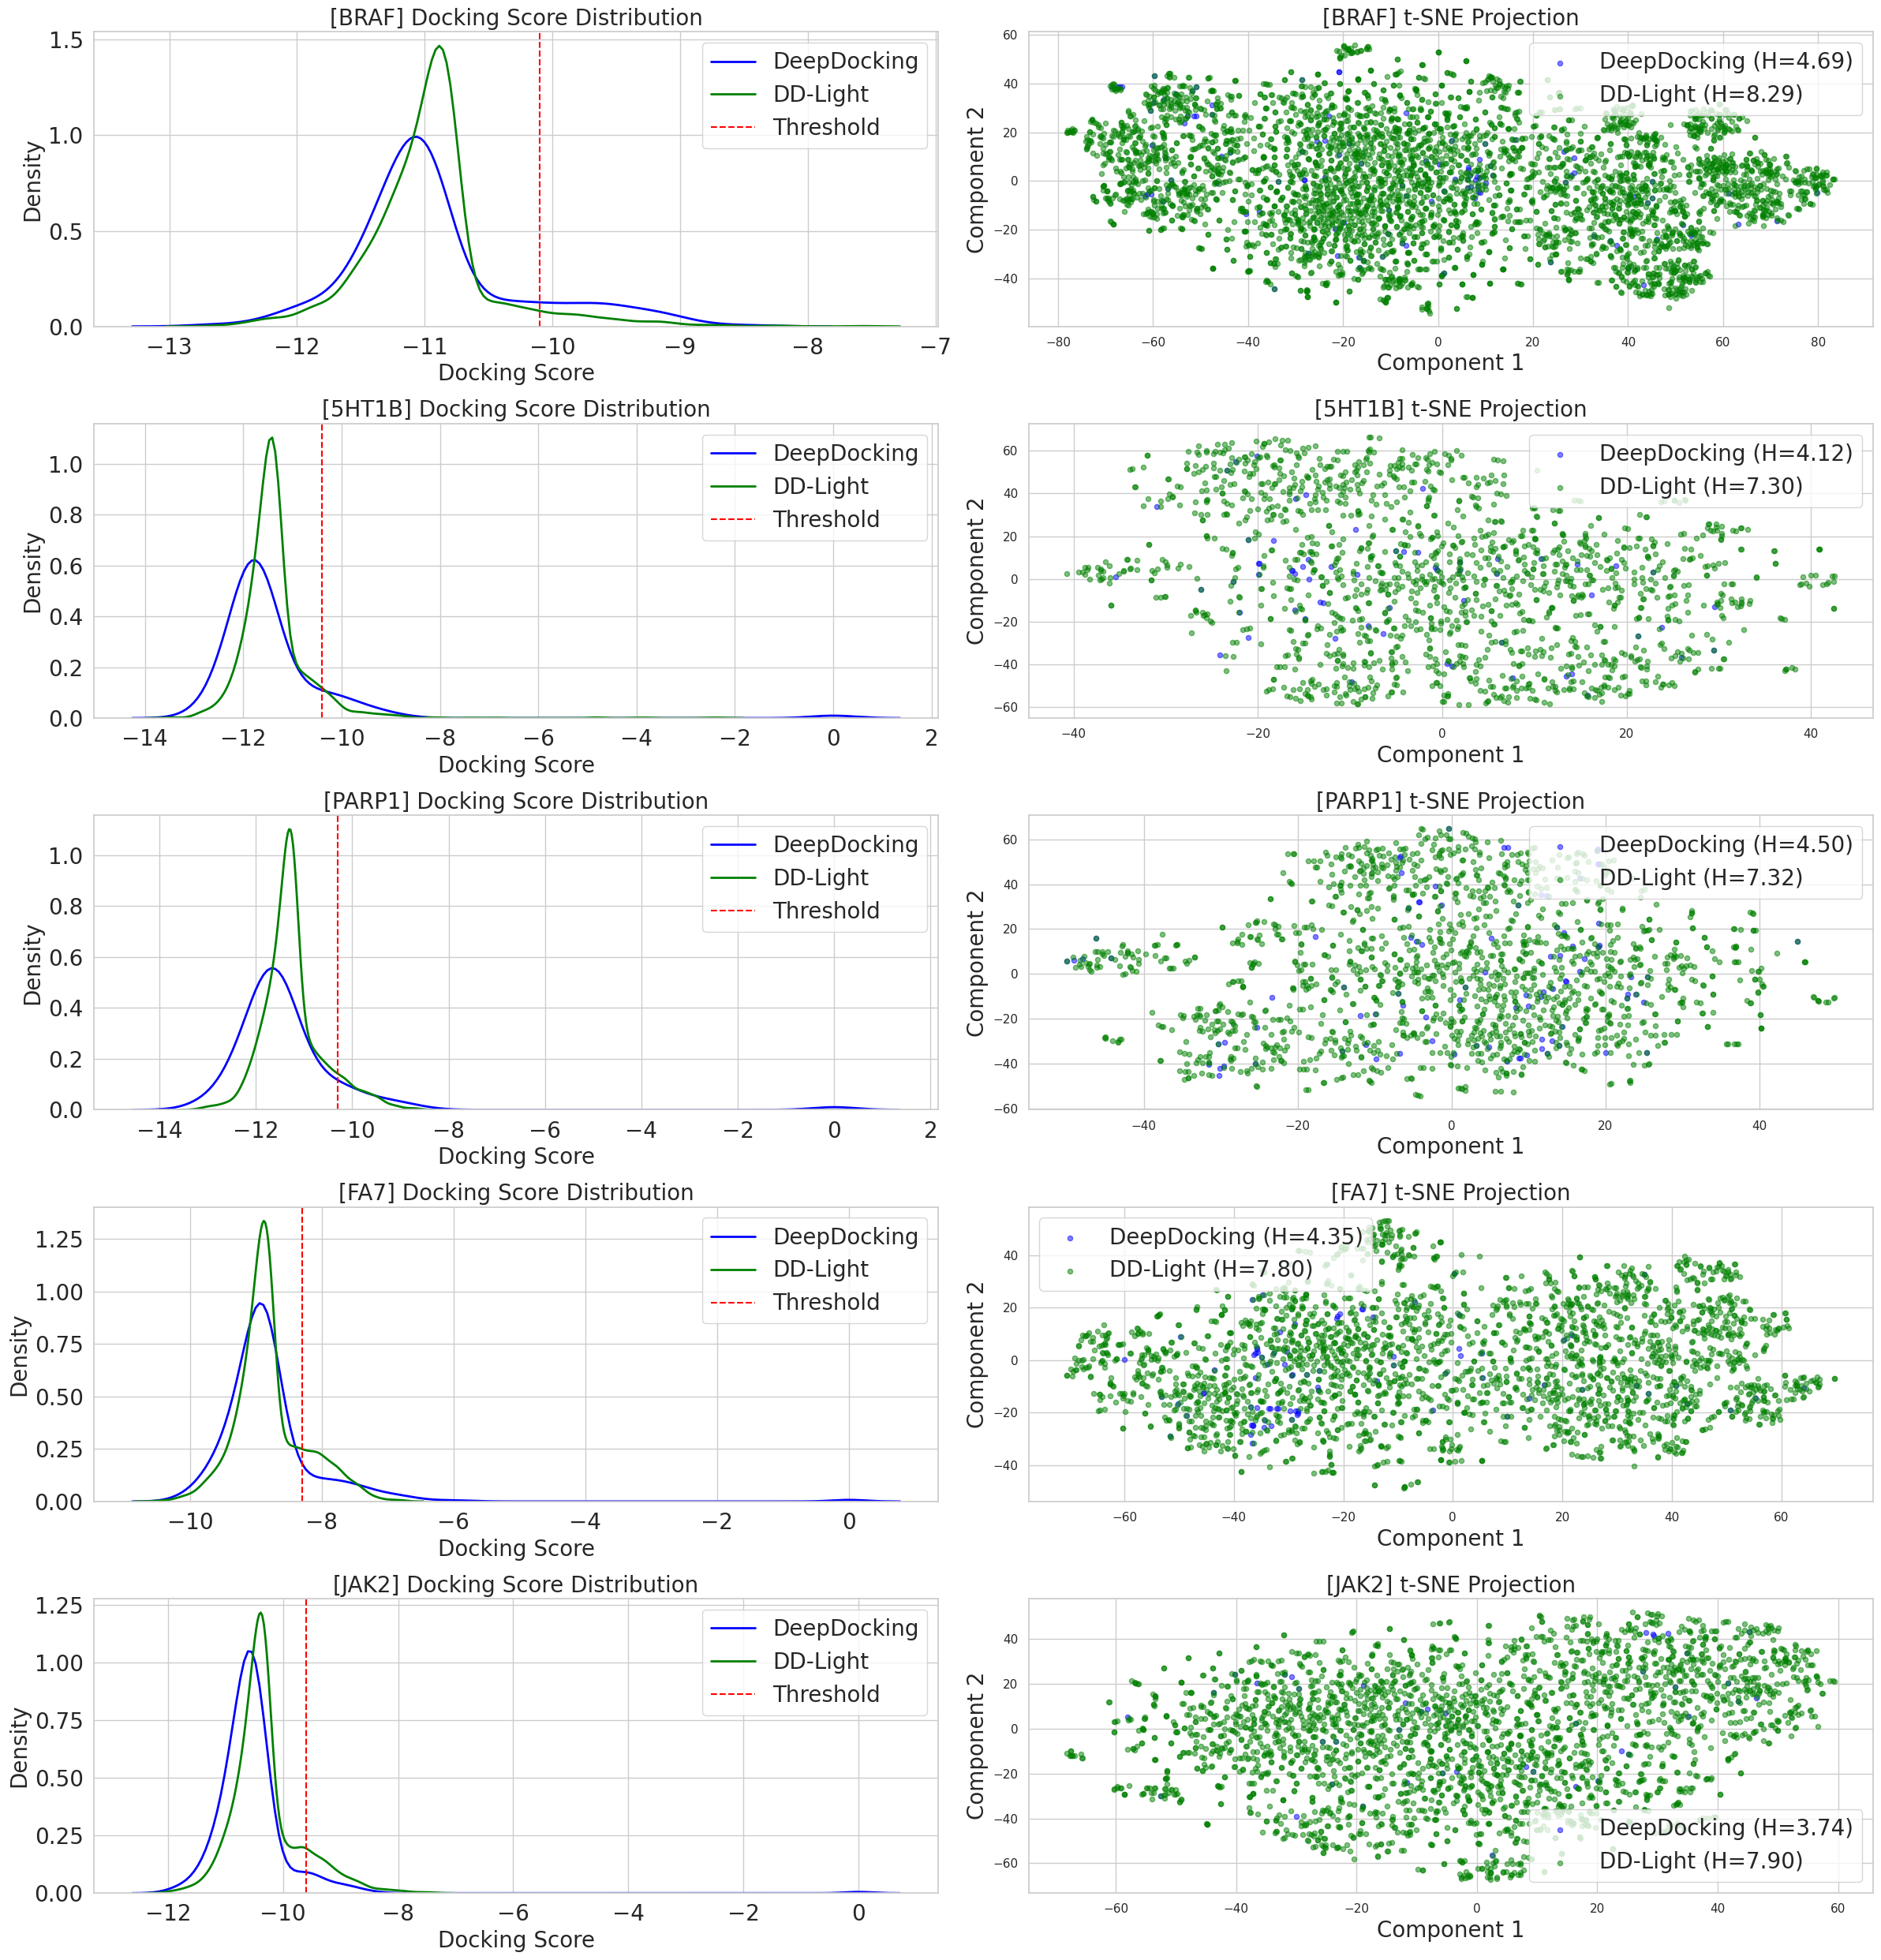

In [31]:
targets = ['braf','5ht1b','parp1', 'fa7','jak2']
iterations = [9,10,9,10,9]
plot_tsne_and_docking_distributions(targets, iterations, result, cutoff, save_path='comparison_panel_150dpi.png')